## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results,mouse_metadata, how="left",on="Mouse ID")

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(df["Mouse ID"].unique())


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data = df.loc[df["Mouse ID"] == "g989"]
dup_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dup_data = df.loc[df['Mouse ID'] != 'g989',:]
no_dup_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice in the clean DataFrame.
len(no_dup_data['Mouse ID'].unique())

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
df_drug_regimen = df.groupby(['Drug Regimen'])

# Stats
drug_regimen_mean = round(df_drug_regimen['Tumor Volume (mm3)'].mean(),2)
drug_regimen_median = round(df_drug_regimen['Tumor Volume (mm3)'].median(),2)
drug_regimen_var = round(df_drug_regimen['Tumor Volume (mm3)'].var(),2)
drug_regimen_std = round(df_drug_regimen['Tumor Volume (mm3)'].std(),2)
drug_regimen_sem = round(df_drug_regimen['Tumor Volume (mm3)'].sem(), 2)

# Formatting
drug_regimen_summary = pd.DataFrame({
    'Mean':drug_regimen_mean,
    'Median':drug_regimen_median,
    'Variance':drug_regimen_var,
    'Standard Deviation':drug_regimen_std,
    'SEM':drug_regimen_sem
})

drug_regimen_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
round(df.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"],2)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts


Select a Treatment: 'Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn', 
'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', or 'Ceftamin'
Capomulin


Text(0, 0.5, 'Number of Mice')

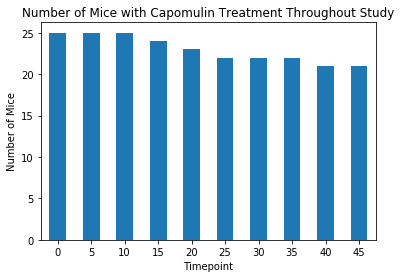

In [32]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# num_mice_treatment = df_drug_regimen['Mouse ID'].count()
# num_mice_treatment.plot(kind='bar')
# plt.title('Total Number of Mice for Each Treatment')
# plt.xlabel('Treatment')
# plt.ylabel('Number of Mice')
# plt.show()

# Input Treatment
treatment_input = input("""
Select a Treatment: 'Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn', 
'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', or 'Ceftamin'
""")
treatment_input = treatment_input.lower().title()

# Look for Treatment Selected
input_df = no_dup_data.loc[no_dup_data['Drug Regimen'] == treatment_input,:]
treatment_freq = input_df.groupby(['Timepoint'])
treatment_mice_count = treatment_freq['Mouse ID'].count()

# Plot
treatment_freq_df = pd.DataFrame(treatment_mice_count)
treatment_freq_df.plot.bar(title=f'Number of Mice with {treatment_input} Treatment Throughout Study',
                           rot = 0,
                           legend = False
)
plt.xlabel('Timepoint')
plt.ylabel('Number of Mice')



([<matplotlib.axis.XTick at 0x1a1d93e610>,
 <a list of 10 Text xticklabel objects>)

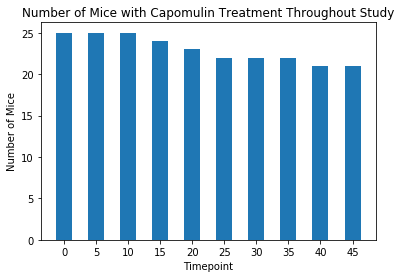

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_labels = treatment_mice_count.index
x = 2.5
width_ = [x,x,x,x,x,x,x,x,x,x]
plt.bar(x_labels, treatment_mice_count,width = width_ , align = 'center')
plt.title(f'Number of Mice with {treatment_input} Treatment Throughout Study')
plt.xlabel('Timepoint')
plt.ylabel('Number of Mice') 
plt.xticks ([x for x in x_labels])


(-1.1018390827045563,
 1.103492681505578,
 -1.1031843716069307,
 1.1001516367431872)

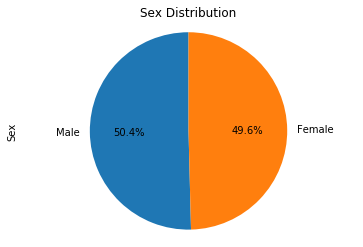

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_df = no_dup_data.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()
sex_df.plot.pie(title = 'Sex Distribution',
               startangle = 90,
               autopct = '%1.1f%%')
plt.axis('equal')


(-1.1018390827045563,
 1.103492681505578,
 -1.1031843716069307,
 1.1001516367431872)

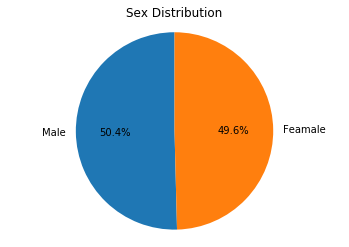

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df,
       labels = ['Male','Feamale'],
       autopct = "%1.1f%%",
       startangle = 90)
plt.title('Sex Distribution')
plt.axis('equal')


## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_lst = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
df_by_timepoints = no_dup_data.sort_values(by=['Timepoint'])
df_last_timepoints = df_by_timepoints.drop_duplicates(subset = 'Mouse ID', keep = 'last')
df_last_timepoints = df_last_timepoints.loc[df_last_timepoints['Timepoint'] != 0, :]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_last_timepoints = df_last_timepoints.loc[
    (df_last_timepoints['Drug Regimen'] == treatment_lst[0])|
    (df_last_timepoints['Drug Regimen'] == treatment_lst[1])|
    (df_last_timepoints['Drug Regimen'] == treatment_lst[2])|
    (df_last_timepoints['Drug Regimen'] == treatment_lst[3]),:
]


In [41]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
lower_qs = []
upper_qs = []
iqrs = []
lower_bounds = []
upper_bounds = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_lst:
    qrts = df_last_timepoints.loc[(df_last_timepoints['Drug Regimen'] == treatment), 'Tumor Volume (mm3)'].quantile ([.25,.5,.75])
    lower_qs.append(round(qrts[0.25],2))
    upper_qs.append(round(qrts[0.75],2))
    iqr = round(qrts[0.75] - qrts[0.25],2)
    iqrs.append(iqr)
    lower_bounds.append(round(qrts[0.25] - (1.5*iqr),2))
    upper_bounds.append(round(qrts[0.75] + (1.5*iqr),2))
    
    
# Data Frame
box_plots_df = pd.DataFrame({
    'Drug Regimen': treatment_lst,
    'Lower Quartile': lower_qs,
    'Upper Quartile': upper_qs,
    'IQR': iqrs,
    'Lower Bounds': lower_bounds,
    'Upper Bounds': upper_bounds
})
box_plots_df
    

,Drug Regimen,Lower Quartile,Upper Quartile,IQR,Lower Bounds,Upper Bounds
0,Capomulin,32.38,40.16,7.78,20.71,51.83
1,Ramicane,31.56,40.66,9.10,17.91,54.31
2,Infubinol,54.05,65.53,11.48,36.83,82.75
3,Ceftamin,56.06,64.63,8.58,43.19,77.50


Text(0.5, 1.0, 'Final Tumor Volume of Each Mouse Across Four Regimens of Interest')

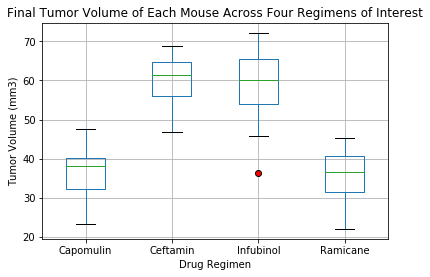

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
df_last_timepoints.boxplot(column = 'Tumor Volume (mm3)',
                           by = 'Drug Regimen',
                           flierprops = dict(markerfacecolor = 'r', marker = 'o'),
                           grid = True
)
plt.ylabel('Tumor Volume (mm3)')
plt.suptitle('')
plt.title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest')


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

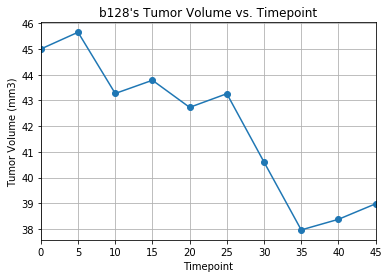

In [61]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = no_dup_data.loc[no_dup_data['Drug Regimen'] == 'Capomulin',:]
mouse = 'b128'
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse, ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Weight (g)']]

mouse_df.plot(x = 'Timepoint',
             y = 'Tumor Volume (mm3)',
             marker = 'o',
             title = f'{mouse}\'s Tumor Volume vs. Timepoint',
             legend = False,
             grid = True)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


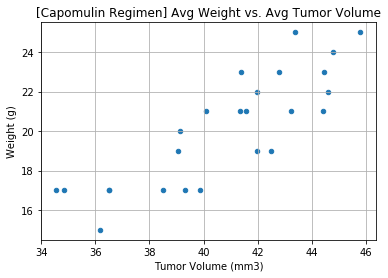

In [62]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df_by_mouse = capomulin_df.groupby('Mouse ID')
weight = capomulin_df_by_mouse['Weight (g)'].mean()
tumor_vol = capomulin_df_by_mouse['Tumor Volume (mm3)'].mean()

scatter_df = pd.DataFrame({
    'Weight (g)':weight,
    'Tumor Volume (mm3)':tumor_vol
})

scatter_df.plot.scatter(x = 'Tumor Volume (mm3)',
                       y = 'Weight (g)',
                       grid = True,
                       title = '[Capomulin Regimen] Avg Weight vs. Avg Tumor Volume')

## Correlation and Regression

Text(22, 37, 'R-squared = 0.71')

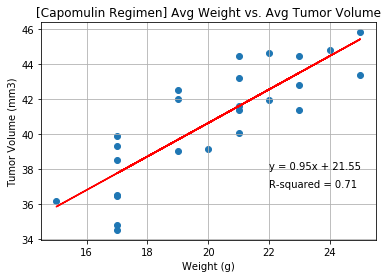

In [68]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = st.pearsonr(weight, tumor_vol)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress (weight, tumor_vol)
plt.scatter (weight, tumor_vol)
plt.title ('[Capomulin Regimen] Avg Weight vs. Avg Tumor Volume')
plt.xlabel ('Weight (g)')
plt.ylabel ('Tumor Volume (mm3)')
plt.grid ()
plt.plot (weight, (weight * slope + intercept), "r-")
plt.annotate (f'y = {round(slope, 2)}x + {round(intercept, 2)}', (22, 38)),
plt.annotate (f'R-squared = {round(corr[0]**2, 2)}', (22, 37))